In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv (r'dataset/survey.csv')

In [3]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [5]:
df.treatment

0       Yes
1        No
2        No
3       Yes
4        No
       ... 
1254    Yes
1255    Yes
1256    Yes
1257     No
1258    Yes
Name: treatment, Length: 1259, dtype: object

Seeing the amount of null values per column

In [6]:
df.treatment.unique()

array(['Yes', 'No'], dtype=object)

In [7]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [8]:
df.shape

(1259, 27)

In [9]:
print('Timestamp => ', df['Timestamp'].unique())
print('Age => ', df['Age'].unique())
print('Gender => ', df['Gender'].unique())
print('Country => ', df['Country'].unique())
print('self_employed => ', df['self_employed'].unique())
print('family_history => ', df['family_history'].unique())
print('treatment => ', df['treatment'].unique())
print('work_interfere => ', df['work_interfere'].unique())
print('no_employees => ', df['no_employees'].unique())
print('remote_work => ', df['remote_work'].unique())
print('tech_company => ', df['tech_company'].unique())
print('benefits => ', df['benefits'].unique())
print('care_options => ', df['care_options'].unique())
print('wellness_program => ', df['wellness_program'].unique())
print('seek_help => ', df['seek_help'].unique())
print('anonymity => ', df['anonymity'].unique())
print('leave => ', df['leave'].unique())
print('mental_health_consequence => ', df['mental_health_consequence'].unique())
print('phys_health_consequence => ', df['phys_health_consequence'].unique())
print('coworkers => ', df['coworkers'].unique())
print('supervisor => ', df['supervisor'].unique())
print('mental_health_interview => ', df['mental_health_interview'].unique())
print('phys_health_interview => ', df['phys_health_interview'].unique())
print('mental_vs_physical => ', df['mental_vs_physical'].unique())
print('obs_consequence => ', df['obs_consequence'].unique())

Timestamp =>  ['2014-08-27 11:29:31' '2014-08-27 11:29:37' '2014-08-27 11:29:44' ...
 '2015-11-07 12:36:58' '2015-11-30 21:25:06' '2016-02-01 23:04:31']
Age =>  [         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]
Gender =>  ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-

Changes null value by mode

In [10]:
df["self_employed"].fillna(df["self_employed"].mode()[0], inplace = True)
df["work_interfere"].fillna(df["work_interfere"].mode()[0], inplace = True)

df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                   0
family_history                  0
treatment                       0
work_interfere                  0
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

Getting rid of useless columns

In [11]:
df.drop('Timestamp', 1, inplace = True)
df.drop('state', 1, inplace = True)
df.drop('comments', 1, inplace = True)
df.drop('Country', 1, inplace = True)

df.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

Check genders.

In [12]:
df.Gender =  df.Gender.str.upper().str.strip()

df.Gender.unique()

array(['FEMALE', 'M', 'MALE', 'MALE-ISH', 'MAILE', 'TRANS-FEMALE',
       'CIS FEMALE', 'F', 'SOMETHING KINDA MALE?', 'CIS MALE', 'WOMAN',
       'MAL', 'MALE (CIS)', 'QUEER/SHE/THEY', 'NON-BINARY', 'FEMAKE',
       'MAKE', 'NAH', 'ALL', 'ENBY', 'FLUID', 'GENDERQUEER', 'ANDROGYNE',
       'AGENDER', 'CIS-FEMALE/FEMME', 'GUY (-ISH) ^_^',
       'MALE LEANING ANDROGYNOUS', 'MAN', 'TRANS WOMAN', 'MSLE', 'NEUTER',
       'FEMALE (TRANS)', 'QUEER', 'FEMALE (CIS)', 'MAIL',
       'A LITTLE ABOUT YOU', 'MALR', 'P', 'FEMAIL', 'CIS MAN',
       'OSTENSIBLY MALE, UNSURE WHAT THAT REALLY MEANS'], dtype=object)

Reducing genders into 3 categories (F/M/O)

In [13]:
female_identifiers = ['FEMALE', 'CIS FEMALE', 'F', 'WOMAN', 'FEMAKE', 
                      'CIS-FEMALE/FEMME', 'FEMALE (CIS)', 'FEMAIL']
male_identifiers = ['M', 'MALE', 'MAILE', 'CIS MALE', 'MAL', 'MALE (CIS)', 
                    'MAKE', 'MAN', 'MSLE', 'MAIL', 'MALR', 'CIS MAN', 
                    'OSTENSIBLY MALE, UNSURE WHAT THAT REALLY MEANS']

female_filter = df.Gender.isin(female_identifiers)
male_filter = df.Gender.isin(male_identifiers)

df.loc[female_filter, 'Gender'] = 'F'
df.loc[male_filter, 'Gender'] = 'M'

other_filter = ~df.Gender.isin(['M', 'F'])
df.loc[other_filter, 'Gender'] = 'O'

Replace invalid ages (not between 17 and 72) with the valid age mean.

In [14]:
invalid_age_filter = ~df.Age.between(17, 72)
valid_age_mean = int(np.trunc(df[~invalid_age_filter].Age.mean())) 
df.loc[invalid_age_filter, 'Age'] = valid_age_mean

Encodes string binary value to integer

In [15]:
label_encoder = LabelEncoder()
df.self_employed = label_encoder.fit_transform(df.self_employed)
df.family_history = label_encoder.fit_transform(df.family_history)
df.treatment = label_encoder.fit_transform(df.treatment)
df.remote_work = label_encoder.fit_transform(df.remote_work)
df.tech_company = label_encoder.fit_transform(df.tech_company)
df.obs_consequence = label_encoder.fit_transform(df.obs_consequence)

In [16]:
df = pd.concat([df, pd.get_dummies(df['mental_vs_physical'], prefix='mental_vs_physical')], axis=1)
df = pd.concat([df, pd.get_dummies(df['phys_health_interview'], prefix='phys_health_interview')], axis=1)
df = pd.concat([df, pd.get_dummies(df['mental_health_interview'], prefix='mental_health_interview')], axis=1)
df = pd.concat([df, pd.get_dummies(df['supervisor'], prefix='supervisor')], axis=1)
df = pd.concat([df, pd.get_dummies(df['coworkers'], prefix='coworkers')], axis=1)
df = pd.concat([df, pd.get_dummies(df['phys_health_consequence'], prefix='phys_health_consequence')], axis=1)
df = pd.concat([df, pd.get_dummies(df['leave'], prefix='leave')], axis=1)
df = pd.concat([df, pd.get_dummies(df['anonymity'], prefix='anonymity')], axis=1)
df = pd.concat([df, pd.get_dummies(df['seek_help'], prefix='seek_help')], axis=1)
df = pd.concat([df, pd.get_dummies(df['wellness_program'], prefix='wellness_program')], axis=1)
df = pd.concat([df, pd.get_dummies(df['care_options'], prefix='care_options')], axis=1)
df = pd.concat([df, pd.get_dummies(df['benefits'], prefix='benefits')], axis=1)
df = pd.concat([df, pd.get_dummies(df['no_employees'], prefix='no_employees')], axis=1)
df = pd.concat([df, pd.get_dummies(df['work_interfere'], prefix='work_interfere')], axis=1)
df = pd.concat([df, pd.get_dummies(df['mental_health_consequence'], prefix='mental_health_consequence')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Gender'], prefix='gender')], axis=1)
df

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,mental_health_consequence_Maybe,mental_health_consequence_No,mental_health_consequence_Yes,gender_F,gender_M,gender_O
0,37,F,0,0,1,Often,6-25,0,1,Yes,...,0,1,0,0,0,1,0,1,0,0
1,44,M,0,0,0,Rarely,More than 1000,0,0,Don't know,...,0,0,1,0,1,0,0,0,1,0
2,32,M,0,0,0,Rarely,6-25,0,1,No,...,0,0,1,0,0,1,0,0,1,0
3,31,M,0,1,1,Often,26-100,0,1,No,...,0,1,0,0,0,0,1,0,1,0
4,31,M,0,0,0,Never,100-500,1,1,Yes,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,M,0,0,1,Sometimes,26-100,0,1,No,...,0,0,0,1,0,1,0,0,1,0
1255,32,M,0,1,1,Often,26-100,1,1,Yes,...,0,1,0,0,0,1,0,0,1,0
1256,34,M,0,1,1,Sometimes,More than 1000,0,1,Yes,...,0,0,0,1,0,0,1,0,1,0
1257,46,F,0,0,0,Sometimes,100-500,1,1,No,...,0,0,0,1,0,0,1,1,0,0


Applys one hot encode

In [17]:
df.drop(['mental_vs_physical'], axis='columns', inplace = True)
df.drop(['phys_health_interview'], axis='columns', inplace = True)
df.drop(['mental_health_interview'], axis='columns', inplace = True)
df.drop(['supervisor'], axis='columns', inplace = True)
df.drop(['coworkers'], axis='columns', inplace = True)
df.drop(['phys_health_consequence'], axis='columns', inplace = True)
df.drop(['leave'], axis='columns', inplace = True)
df.drop(['anonymity'], axis='columns', inplace = True)
df.drop(['seek_help'], axis='columns', inplace = True)
df.drop(['wellness_program'] , axis='columns', inplace = True)
df.drop(['care_options'], axis='columns', inplace = True)
df.drop(['benefits'], axis='columns', inplace = True)
df.drop(['no_employees'], axis='columns', inplace = True)
df.drop(['work_interfere'], axis='columns', inplace = True)
df.drop(['mental_health_consequence'], axis='columns', inplace = True)
df.drop(['Gender'], axis='columns', inplace = True)
df.shape

(1259, 61)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 61 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Age                              1259 non-null   int64
 1   self_employed                    1259 non-null   int64
 2   family_history                   1259 non-null   int64
 3   treatment                        1259 non-null   int64
 4   remote_work                      1259 non-null   int64
 5   tech_company                     1259 non-null   int64
 6   obs_consequence                  1259 non-null   int64
 7   mental_vs_physical_Don't know    1259 non-null   uint8
 8   mental_vs_physical_No            1259 non-null   uint8
 9   mental_vs_physical_Yes           1259 non-null   uint8
 10  phys_health_interview_Maybe      1259 non-null   uint8
 11  phys_health_interview_No         1259 non-null   uint8
 12  phys_health_interview_Yes        1259 non-null  

Find by Principal Component Analysis

In [19]:
pca = PCA(0.95)
df_pca = pca.fit_transform(df)
pd.DataFrame(df_pca)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,4.917309,1.603474,0.038512,-0.171217,-0.296819,-0.240870,0.362006,0.170123,0.345948,0.324411,-0.366653,0.931900,-0.523564,1.229586,-0.305711,-0.669010,-0.630178,-0.555118
1,11.916057,-1.181977,-0.416991,1.676888,0.966283,0.602445,-0.745833,0.163177,0.098706,0.073168,0.423704,0.610071,0.826619,0.247671,-0.265177,0.613811,0.260914,-0.302357
2,-0.108543,0.130860,-1.322999,-1.522015,0.572429,0.420437,-0.143214,0.322099,-0.026042,1.048826,0.845163,-0.720523,-0.001083,0.257208,0.140879,0.424430,-0.188649,-0.551635
3,-1.075383,-0.460669,0.962437,-1.763072,0.225036,-1.299719,0.606086,0.221660,0.215307,0.915745,-0.416884,-0.444098,0.061745,-0.489229,-0.371857,-0.475390,0.595865,0.319536
4,-1.072957,0.541198,-1.369612,1.108853,0.201750,0.159131,-0.435483,0.338007,0.282309,0.614997,0.365029,-0.058324,-0.233163,-0.967257,0.150211,-0.029956,0.915865,-0.250922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,-6.100328,-0.462376,-0.436903,-0.529750,-0.942889,1.054539,-0.132717,-0.358608,-0.338662,0.149921,-0.578173,-0.231623,-0.873830,-0.206502,-0.569136,0.937819,0.045132,0.736399
1255,-0.060395,1.424506,0.458359,-0.851478,-0.261924,0.900330,0.522178,0.303960,0.006675,0.516574,-0.684613,0.188781,0.415342,-0.334789,-0.239015,-0.628585,0.289702,0.941745
1256,1.953730,-0.779488,1.708264,-0.518111,1.155376,0.290670,0.392104,0.017220,-0.621223,0.250310,-0.172246,-0.798043,0.013460,-0.160714,-0.052169,0.094771,-0.713539,0.347395
1257,13.915523,-1.217401,0.592221,-0.732363,0.922480,0.748242,0.428075,-0.139359,-0.220267,-0.043032,-0.692650,0.156635,-0.330464,0.243787,1.660710,0.032572,-0.086192,-0.310532


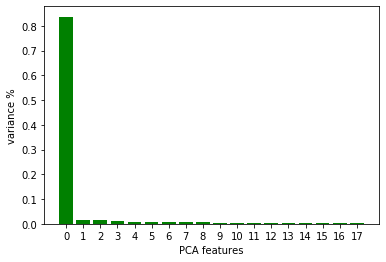

In [20]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='green')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

In [21]:
pd.DataFrame(pca.components_,columns=df.columns)

,Age,self_employed,family_history,treatment,remote_work,tech_company,obs_consequence,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes,...,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,mental_health_consequence_Maybe,mental_health_consequence_No,mental_health_consequence_Yes,gender_F,gender_M,gender_O
0,0.999516,0.003194,0.000649,0.005116,0.009218,-0.003096,0.003462,-0.000091,0.001480,-0.001389,...,0.002188,-0.000698,0.001390,-0.002880,0.000517,-0.003890,0.003373,-0.004250,0.005082,-0.000832
1,-0.008496,0.026689,0.033205,0.062644,0.009144,0.004784,-0.022930,-0.156816,-0.109366,0.266181,...,-0.003931,0.005744,0.026931,-0.028744,-0.125772,0.286807,-0.161035,0.005317,-0.009841,0.004524
2,-0.019329,-0.021778,0.159565,0.224262,-0.063160,-0.084135,0.109459,-0.101905,0.155827,-0.053922,...,-0.084609,0.040960,0.043788,-0.000139,0.094793,-0.271807,0.177015,0.145604,-0.163100,0.017496
3,-0.004616,-0.106689,-0.016447,-0.062898,-0.073984,-0.048086,-0.059894,0.199444,-0.151148,-0.048296,...,0.059554,-0.057695,0.005974,-0.007833,0.112806,-0.028132,-0.084675,0.060383,-0.053275,-0.007108
4,-0.003399,-0.001945,-0.028234,-0.065205,0.018110,-0.015575,-0.003231,-0.114648,0.060724,0.053924,...,0.048314,-0.005578,0.018092,-0.060829,-0.389133,0.112802,0.276331,-0.048722,0.044850,0.003872
5,0.002211,0.006384,0.036994,0.015995,0.005138,0.041778,-0.077679,0.180020,-0.193741,0.013721,...,-0.008194,-0.014755,0.043195,-0.020246,-0.019360,0.128447,-0.109086,0.081955,-0.077470,-0.004484
6,0.007102,0.056880,0.376721,0.379400,0.151553,0.020146,0.094162,-0.205839,0.155665,0.050174,...,-0.210062,0.068588,-0.011329,0.152804,-0.133078,0.060218,0.072860,0.265502,-0.285565,0.020064
7,0.000599,-0.127712,0.241488,0.309198,-0.073071,-0.013415,-0.038346,0.270006,-0.070293,-0.199713,...,-0.064536,0.104974,0.126404,-0.166843,0.141152,-0.051324,-0.089828,0.073562,-0.073211,-0.000351
8,-0.003498,0.163213,-0.028819,0.032242,0.243609,0.086265,-0.035186,0.207869,-0.252670,0.044801,...,0.216801,0.142557,0.159645,-0.519002,0.068888,-0.055218,-0.013671,0.134669,-0.145489,0.010820
9,-0.000646,-0.093976,-0.028642,-0.024493,-0.193082,-0.085542,0.107679,-0.265678,0.318992,-0.053315,...,0.274291,0.143389,0.153760,-0.571439,-0.179256,0.076632,0.102624,-0.050517,0.043997,0.006520


In [22]:
df.drop(['Age'], axis='columns', inplace = True)

In [23]:
pca = PCA(0.95)
df_pca = pca.fit_transform(df)
pd.DataFrame(df_pca)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1.634620,-0.004682,-0.175416,-0.301894,-0.238609,0.388415,-0.169574,0.317044,0.309409,-0.535898,...,-0.505938,1.017270,0.234207,0.840496,0.140574,-0.156236,-0.199999,0.046384,0.409687,-0.292879
1,-1.067004,0.029233,1.749981,1.004759,0.589102,-0.812007,-0.164130,0.106630,0.075214,0.384322,...,0.329447,-0.744699,0.246556,-0.607036,0.320393,0.362252,0.146292,0.215016,0.374616,0.192225
2,0.043458,-1.450190,-1.405177,0.580681,0.421913,-0.169195,-0.320558,-0.003311,1.055178,0.836287,...,-0.059599,0.099538,0.819495,-0.472432,-0.684546,0.042621,0.432830,0.038801,-0.082928,0.270372
3,-0.440119,0.808060,-1.839284,0.236666,-1.280892,0.636852,-0.216965,0.229167,0.915027,-0.363876,...,-0.470723,-0.827316,-0.025373,0.560130,0.079558,0.546930,0.184589,-0.297175,0.462498,-0.296088
4,0.482278,-1.283862,1.220229,0.226241,0.143598,-0.494872,-0.334625,0.315928,0.623514,0.452107,...,0.106187,0.825737,-0.345739,-0.278222,-0.059293,-0.480884,0.231022,-0.247921,0.266844,0.100802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,-0.556279,-0.590658,-0.509260,-0.982440,1.042337,-0.119228,0.353928,-0.358614,0.146475,-0.563814,...,-0.034227,-0.013549,0.211201,0.361465,0.036285,-0.257454,-0.213917,-0.203232,-0.126699,-0.086489
1255,1.434902,0.298716,-0.897399,-0.293990,0.902749,0.504301,-0.298048,0.031825,0.518156,-0.621531,...,-0.412937,0.224933,-0.054696,0.087796,0.477461,0.088400,0.274549,-0.373376,0.880206,0.428408
1256,-0.670060,1.745318,-0.648579,1.138092,0.324684,0.413390,-0.016547,-0.599341,0.258856,-0.080508,...,-0.298282,-0.495798,-0.328039,-0.056072,-0.130290,0.139919,0.348947,-0.393162,-0.023440,0.672321
1257,-1.062376,0.850479,-0.733452,0.937614,0.750848,0.364348,0.146511,-0.186902,-0.039526,-0.654920,...,0.703030,-0.180980,0.067619,-0.005233,0.276290,0.072070,-0.655973,-0.375226,0.107292,-0.022844


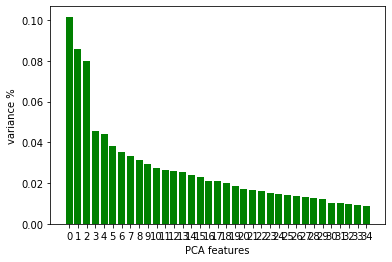

In [24]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='green')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

In [25]:
df.to_csv(r'outputs/cleaned_survey.csv')